<a href="https://colab.research.google.com/github/Abyy98/T5W3/blob/main/CNN_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Neural Network (CNN) using Keras
This notebook will guide you through the process of creating a CNN model using Keras. Follow the steps and fill in the code blocks as you progress.

# Dataset Card: Men vs. Women Classification

## Overview
The Men vs. Women Classification dataset contains images of men and women intended for binary image classification tasks. The goal is to classify images based on gender.

- **Dataset URL:** [Men vs. Women Classification Dataset](https://www.kaggle.com/datasets/saadpd/menwomen-classification)
- **Dataset Size:** ~845 MB
- **Classes:** 2 (Men, Women)
- **Image Format:** JPEG

## Structure

### Folders
The dataset is organized into two main folders:

- `traindata/`:
  - `traindata/`: Contains the training images.
    - `men/`: Contains images of men.
    - `women/`: Contains images of women.

- `testdata/`:
  - `testdata/`: Contains the testing images.
    - `men/`: Contains images of men.
    - `women/`: Contains images of women.

### Example Files
Here are some example file names you might find in the dataset:

- `traindata/traindata/men/000000899.jpg`
- `traindata/traindata/women/00000001.jpg`
- `testdata/testdata/men/00000504.jpg`
- `testdata/testdata/women/00000002.jpg`

### Image Specifications
- **Resolution:** Varies
- **Color:** RGB

## Usage
This dataset is ideal for practicing binary image classification using Convolutional Neural Networks (CNNs). It can be used to train a model to distinguish between images of men and women.

## Step 1: Import Required Libraries
Begin by importing the necessary libraries.

In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
!kaggle datasets download -d saadpd/menwomen-classification

500 - Internal Server Error - InternalServerError


## Step 2: Load and Preprocess Data
Load your dataset and preprocess it. This may include resizing images, normalizing pixel values, and splitting the data into training and validation sets.

In [ ]:
# Load and preprocess the data
# Hint: Use ImageDataGenerator for image preprocessing
# Example:
# datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
# train_generator = datagen.flow_from_directory('path_to_data', target_size=(img_height, img_width), batch_size=batch_size, class_mode='categorical', subset='training')
# validation_generator = datagen.flow_from_directory('path_to_data', target_size=(img_height, img_width), batch_size=batch_size, class_mode='categorical', subset='validation')

In [2]:
import zipfile
with zipfile.ZipFile('menwomen-classification.zip', 'r') as zip_ref:
    zip_ref.extractall()

print("Dataset downloaded and extracted successfully.")

Dataset downloaded and extracted successfully.


In [3]:
import os
os.listdir()

['.config',
 'menwomen-classification.zip',
 'traindata',
 'testdata',
 'sample_data']

In [4]:
# Load and preprocess the data
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Set the parameters
img_height, img_width = 150, 150
batch_size = 32

# Load training data
train_generator = datagen.flow_from_directory(
    '/content/traindata/traindata',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training')

# Load validation data
validation_generator = datagen.flow_from_directory(
    '/content/testdata/testdata',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')


Found 2313 images belonging to 2 classes.
Found 265 images belonging to 2 classes.


## Step 3: Data Augmentation
To prevent overfitting, augment your data using various transformations like rotation, zoom, flip, etc.

In [ ]:
# Data Augmentation
# Example:
# datagen_train = ImageDataGenerator(
#    rescale=1./255,
#    rotation_range=40,
#    width_shift_range=0.2,
#    height_shift_range=0.2,
#    shear_range=0.2,
#    zoom_range=0.2,
#    horizontal_flip=True,
#    fill_mode='nearest')

## Step 4: Build the CNN Model
Define the architecture of your CNN model. Start with convolutional layers followed by pooling layers, and end with fully connected layers.

In [ ]:
# Build the model
# Example:
# model = Sequential([
#    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
#    MaxPooling2D(2, 2),
#    Conv2D(64, (3, 3), activation='relu'),
#    MaxPooling2D(2, 2),
#    Flatten(),
#    Dense(128, activation='relu'),
#    Dropout(0.5),
#    Dense(num_classes, activation='softmax')
# ])
# model.summary()

In [13]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax'),
    Dense(2, activation='softmax')
])
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 82944)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │      10,616,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │           1,290 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 2)                   │              22 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,637,664 (40.58 MB)

 Trainable params: 10,637,664 (40.58 MB)

 Non-trainable params: 0 (0.00 B)

## Step 5: Compile the Model
Compile your model by specifying the optimizer, loss function, and evaluation metrics.

In [7]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [44]:
# Compile the model
# Example:
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Step 6: Train the Model
Train your model using the training data and validate it using the validation data.

In [8]:
# Train the model
epochs = 5  # Set the number of epochs
history = model.fit(train_generator, epochs=epochs, validation_data=validation_generator)


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


73/73 ━━━━━━━━━━━━━━━━━━━━ 38s 399ms/step - accuracy: 0.6458 - loss: 0.6487 - val_accuracy: 0.6868 - val_loss: 0.6164
Epoch 2/5
73/73 ━━━━━━━━━━━━━━━━━━━━ 31s 329ms/step - accuracy: 0.6870 - loss: 0.6125 - val_accuracy: 0.6868 - val_loss: 0.6180
Epoch 3/5
73/73 ━━━━━━━━━━━━━━━━━━━━ 25s 312ms/step - accuracy: 0.6802 - loss: 0.6174 - val_accuracy: 0.6792 - val_loss: 0.6026
Epoch 4/5
73/73 ━━━━━━━━━━━━━━━━━━━━ 25s 320ms/step - accuracy: 0.7124 - loss: 0.5951 - val_accuracy: 0.6981 - val_loss: 0.6095
Epoch 5/5
73/73 ━━━━━━━━━━━━━━━━━━━━ 25s 324ms/step - accuracy: 0.7264 - loss: 0.5721 - val_accuracy: 0.6906 - val_loss: 0.5963


In [ ]:
# Train the model
# Example:
# history = model.fit(train_generator, epochs=epochs, validation_data=validation_generator)

## Step 7: Evaluate the Model
Evaluate the performance of your model using the validation set.

In [9]:
# Evaluate the model
loss, accuracy = model.evaluate(validation_generator)
print(f'Validation Loss: {loss}')
print(f'Validation Accuracy: {accuracy}')


9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 337ms/step - accuracy: 0.7044 - loss: 0.5831
Validation Loss: 0.59626704454422
Validation Accuracy: 0.6905660629272461


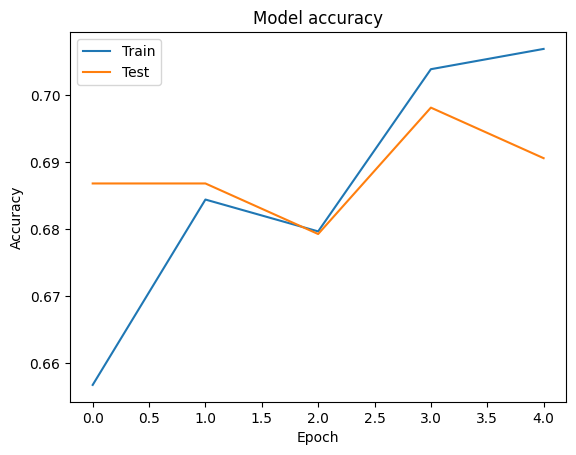

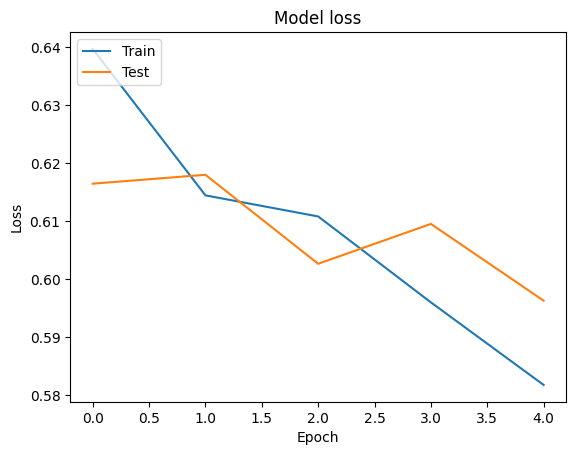

In [10]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
# Evaluate the model
# Example:
# loss, accuracy = model.evaluate(validation_generator)
# print(f'Validation Loss: {loss}')
# print(f'Validation Accuracy: {accuracy}')

## Step 8: Save the Model
Finally, save your trained model for future use.

In [ ]:
# Save the model
# Example:
# model.save('my_cnn_model.h5')

In [11]:
# Save the model
model.save('men_vs_women_classifier.h5')
